# Examining the diffusion connectivity network

In [1]:
import sys
sys.path.append('../../')

In [2]:
from codes.docs.analysis import graph_analysis, data_preprocessing

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import pickle
import pandas as pd
%matplotlib inline

In [3]:
diff_matrices=pickle.load(open('./dataset/diff_matrices.p','rb'))
diff_subject_info=pd.read_csv(open('./dataset/diff_subject_info.csv','rb'))

In [6]:
! ls dataset/diff_dataset

2020_04_MASTER_SCandFC_433subj_legend.txt
2020_04_MASTER_connectomes90_433subj_SCandFC_TermScansVolOK.mat
GM_structures.csv
Regions_of_Interests.csv
Regions_of_Interests.xlsx
demogrpahic.csv
demogrpahic_asd.csv
high_risk.m
matrices.csv
matrices.txt
matrices_asd.csv
save_data.m
save_data_asd.m
tests.m


In [8]:
import scipy.io

In [10]:
! cat dataset/diff_dataset/2020_04_MASTER_SCandFC_433subj_legend.txt




















  volBOLDAll             90x433                 311760  double  Volume (in voxels) used to calculate FC for each region

In [11]:
diff_dataset=scipy.io.loadmat('./dataset/diff_dataset/2020_04_MASTER_connectomes90_433subj_SCandFC_TermScansVolOK.mat')

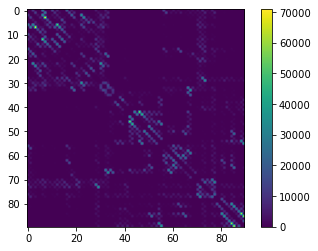

In [4]:
plt.imshow(diff_matrices[1])
plt.colorbar()

removing the zero connections. 

In [5]:
diff_matrices_input=np.asarray([data_preprocessing.lower_triangle(diff_matrices[i]) for i in range(diff_matrices.shape[0])])

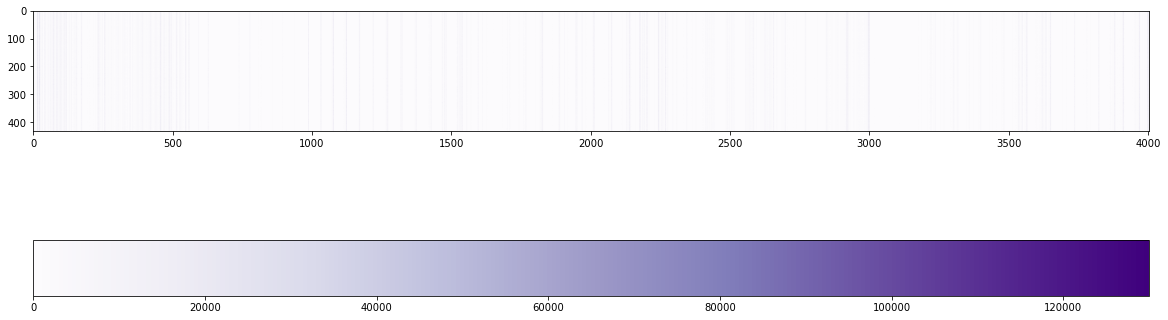

In [7]:
fig,ax=plt.subplots(figsize=(20,10))
im=ax.imshow((diff_matrices_input),cmap='Purples')
fig.colorbar(im,orientation='horizontal',pad=0.2)
plt.show()

In [8]:
features_to_be_removed=np.asarray([i for i in range(0,4005) if len(np.where(diff_matrices_input[:,i]==0)[0])/diff_matrices_input.shape[0] > 0])
diff_matrices_input_removed_zeros=np.delete(diff_matrices_input,features_to_be_removed,axis=1)
# combinations_without_zeros=np.delete(connectivity_combinations,features_to_be_removed)

In [9]:
diff_matrices_input_removed_zeros.shape

(433, 1978)

In [11]:
VarianceThreshold(threshold=100000).fit_transform(diff_matrices_input_removed_zeros).shape

(433, 766)

In [59]:
from sklearn.preprocessing import normalize

In [65]:
normalize(diff_matrices_input)

array([[1.30977014e-03, 3.11400157e-02, 7.45587162e-04, ...,
        0.00000000e+00, 4.93266493e-02, 0.00000000e+00],
       [9.67527859e-04, 3.90781746e-02, 9.68363292e-04, ...,
        5.38831882e-06, 6.61386019e-02, 3.75741676e-06],
       [1.29689047e-03, 6.22764994e-02, 6.31769768e-04, ...,
        0.00000000e+00, 6.77809836e-02, 2.97849387e-05],
       ...,
       [3.05446871e-04, 3.70277194e-02, 1.33530674e-04, ...,
        0.00000000e+00, 6.18952709e-02, 5.17128542e-07],
       [6.92828576e-04, 3.77005400e-02, 6.89183996e-04, ...,
        0.00000000e+00, 4.40930449e-02, 2.13077773e-06],
       [5.93865593e-04, 3.79899611e-02, 4.93760509e-04, ...,
        6.98251044e-07, 5.76073785e-02, 2.59188054e-06]])